# 데이터마이닝 4주차 과제

In [2]:
# 문제 풀이를 위한 모듈 import 
import pandas as pd
import seaborn as sns
import dmba 

no display found. Using non-interactive Agg backend


### 문제1.
 아침 식사용 시리얼 데이터(Cereals.csv)를 이용하여 ‘Calories’ 변수에 대한 요약 통계(평균, 표준편차, 최소값, 최대값, 중앙값)를 도출하시오. 요약 통계는 python을 이 용하여 두 가지 방식(한번에 계산하기, 각각 계산하기)으로 도출하고, 코드 및 결과 화면을 캡처해서 제출하시오.

https://github.com/reisanar/datasets/blob/master/Cereals.csv

In [27]:
# 데이터 불러오기 
cere_df = dmba.load_data('Cereals.csv')
cere_df.shape

(77, 16)

In [47]:
# calories 변수에 대한 요약 통계 도출 방법 1

# step1. describe 매서드를 활용하여 데이터 프레임 형태로 요약통계 값(평균,표준편차, 최소값, 최대값, 중앙값)을 추출
# step2. 추출한 값에서 calories 열만 선택
calories_statistics = cere_df.describe()['calories']
# step3. 해당 값에서 중앙값이 50분위 값을 뺀 25,75 분위 값 삭제 
calories_statistics = calories_statistics.drop(['25%','75%'])
print(calories_statistics)

count     77.000000
mean     106.883117
std       19.484119
min       50.000000
50%      110.000000
max      160.000000
Name: calories, dtype: float64


In [53]:
# calories 변수에 대한 요약통계(평균,중앙값,표준편차,최소값,최댓값) 도출방법 2 - 각각 계산하기 
a = cere_df['calories'].mean().round(6)
# 표준편차 구하기
b = cere_df['calories'].std().round(6)
#중앙값 구하기
c = cere_df['calories'].median().round(6)
#최대값
d = cere_df['calories'].max().round(6)
# 최소값
e = cere_df['calories'].min().round(6)


# 주어진 값들을 리스트로 만든 후, 시리즈로 변환한 후 다시 데이터 프레임으로 변환
values = [a, b, c, d, e]
series = pd.Series(values, index=['mean', 'std', 'median', 'max', 'min'])
pd.DataFrame(series)

# 데이터 프레임을 출력합니다.
print(series)

mean      106.883117
std        19.484119
median    110.000000
max       160.000000
min        50.000000
dtype: float64


### 문제2. 
보스턴 주택 데이터(BostonHousing.csv)를 이용하여 ‘CRIM’, ‘RM’, ‘AGE’, ‘LSTAT’, ‘MEDV’ 5개의 변수들 간의 상관관계를 모두 구하고, 이를 히트맵으로 시각화하시오. 상관관계 및 히트맵은 python을 이용하여 도출하고, 코드 및 결과 화면을 캡처해서 결과에 대한 간략한 해석과 함께 제출하시오. (상관관계는 소수점 둘째 자리까지 표기)
https://github.com/reisanar/datasets/blob/master/BostonHousing.csv

In [17]:
# 라이브러리 불러오기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dmba 
from sklearn import datasets
%matplotlib inline

In [18]:
# 데이터 불러오기 및 columns 값 확인하기 
housing_df = dmba.load_data('BostonHousing.csv')
print(housing_df.columns)
housing_df.head(10)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9,0


In [19]:
#데이터 활용을 위한 데이터 기본 정보 확인 
housing_df.info()
# 데이터 결측값 확인
housing_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [20]:
#활용할 컬럼 설정  CRIM’, ‘RM’, ‘AGE’, ‘LSTAT’, ‘MEDV’ 5개의 변수
columns = ['CRIM','RM','AGE', 'LSTAT','MEDV']
columns

['CRIM', 'RM', 'AGE', 'LSTAT', 'MEDV']

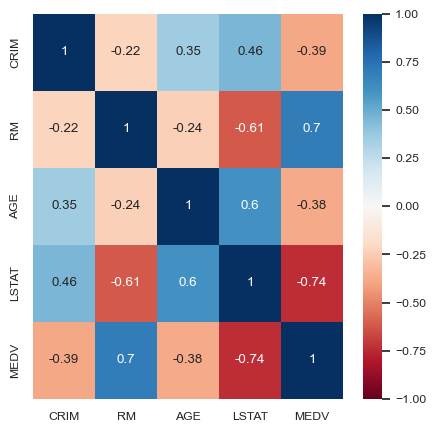

In [21]:
housing_df = housing_df[columns]

# 상관관계 히트맵 그리기 
corr = housing_df.corr()
plt.figure(figsize=(5,5))
sns.set(font_scale = 0.8)
sns.heatmap(corr,xticklabels =corr.columns , yticklabels = corr.columns, vmin =-1, vmax =1 ,cmap="RdBu",annot=True)
plt.show()

히드맵에서 r 값인 상관 계수는 x와 y가 완전히 동일하면 +1, 전혀 다르면 0(무상관 관계), 반대 방향으로 완전히 동일하면 -1을 가진다.
즉 1이거나 -1에 가까울수록 두 변수는 밀접하게 관계가 있다고 볼 수 있다. 

가장 큰 양의 산관관계(정적인 상관관계)를 보이고 있는 변수는 MEDV 와 RM 이다. 이들은 0.7로 매우 강한 양적 선형관계를 이루고 있다고 볼 수 있다.
양의 상관관계이기 때문에 한 변수의 값이 증가할 경우, 다른 변수의 값도 증가하는 관계를 갖고 있는 것을 의미한다.
데이터를 해석하자면 RM과 MEDV는 각각 거주 목적의 방의 개수와 소유주 거주 주택의 주택가격(중간값)을 나타내기 때문에 방의 개수가 증가하면,
주택가격 역시 증가한다는 것을 의미한다. 

가장 큰 음의 상관관계(부적인 상관관계)를 보이는 값은 LSTAT와 MEDV 이다. 이들은 0.74로 매우 강한 음적 선형 관계를 이루고 있다고 볼 수 있다.
음의 상관관계이기 때문에 한 변수의 값이 증가시, 다른 변수가 감소하는 관계를 갖고 있는 것을 의미한다.
데이터를 해석하자면  LSTAT와 MEDV는 각각 저소득층 비율과 소유주 거주 주택의 주택 가격을 나타내기 때문에 주택 가격이 증가하면, 해당 지역의 저소득층 비율이 감소한다는 것을 의미한다.



그외 간단히 볼 수 있는 것은 뚜렷한 선형 관계를 보이고 있는 값들 이다. 
CRIM과 LSTAT는 0.46으로 뚜렷한 양적 선형 관계를 보이고 있다.  CRIM과 LSTAT는 각각 범죄 발생률과 저소득층 비율을 보여주는데, 이를 해석하면 저소득층이 증가할 경우, 
해당 지역의 1인당 범죄 발생률도 같이 증가한다고 볼 수 있다.

또, RM과 LSTAT는 -0.61으로 뚜렷한 음적 선형 관계를 보이고 있다. RM과 LSTAT는 각각 방의 개수와 저소득층 비율을 보여주는데, 음적 선형관계에 따라 한 변수의 값이 증가하면 다른 변수의 값이 감소하는 것을 의미한다. 이 데이터의 경우, 방의 개수가 증가하는 경우, 저소득층 비율은 반대로 감소할 것이라는 것을 해석할 수 있다. 이 값은 앞서 보았던 강한 양적 관계 값을 나타내는 해석결과 값들과도 연관된다고 볼 수 있다. 